#  Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder


from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

import joblib
import pickle  

import warnings
warnings.filterwarnings("ignore")

# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.base import BaseEstimator, TransformerMixin


In [16]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

In [17]:

from bokeh.plotting import output_notebook
output_notebook()

Loading BokehJS ...

# Data Loading

In [2]:
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df = df.drop(columns=['id'])
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Data Exploration (Data Understanding)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [5]:
df.describe(include=('O'))

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [6]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Explore Columns

In [7]:
value_counts = {col: df[col].value_counts() for col in df.columns}

for col, counts in value_counts.items():
    print(f"Value count for this column {col}:")
    print(counts)
    print("\n")

Value count for this column gender:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


Value count for this column age:
age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: count, Length: 104, dtype: int64


Value count for this column hypertension:
hypertension
0    4612
1     498
Name: count, dtype: int64


Value count for this column heart_disease:
heart_disease
0    4834
1     276
Name: count, dtype: int64


Value count for this column ever_married:
ever_married
Yes    3353
No     1757
Name: count, dtype: int64


Value count for this column work_type:
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


Value count for this column Residence_type:
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64


Value count for this column avg_glucose_level:

In [8]:
df[df['gender']=="Other"]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [9]:
df = df[df['gender'] != "Other"]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.0+ KB


In [11]:
df["stroke"].value_counts()

stroke
0    4860
1     249
Name: count, dtype: int64

### Data Cleaning

In [12]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
df = df.dropna(subset=['bmi'])
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [14]:
df["stroke"].value_counts()

stroke
0    4699
1     209
Name: count, dtype: int64

In [15]:
df.duplicated().sum()

0

In [22]:
import nbformat
print(nbformat.__version__)

5.10.4


# EDA

In [20]:
fig = px.pie(df, names = 'stroke', title = 'the Ratio of stroke', template = 'plotly_dark')
fig.update_traces(rotation=90, pull = [0.1], textinfo = "percent+label")
fig.show()

here we have imbalanced data 95.7% vs 4.26%

In [19]:
fig = px.sunburst(df, path=['gender','stroke']).update_traces(textinfo='label+percent parent')
fig.show()

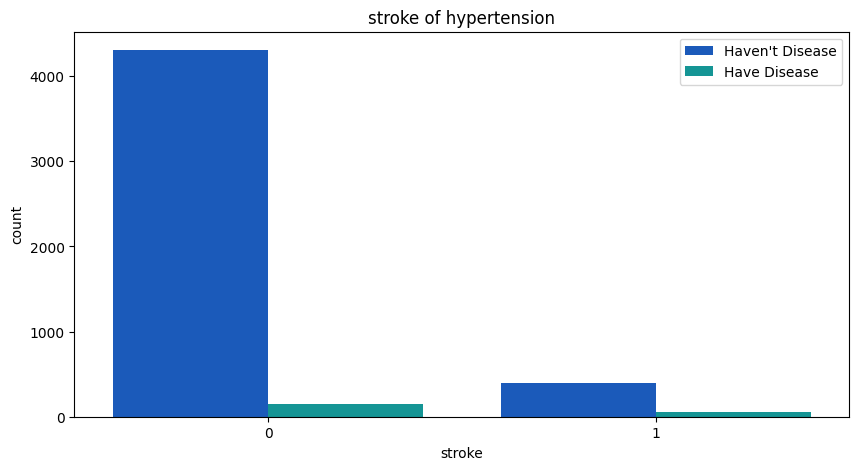

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x='hypertension',data=df,hue='stroke',palette='winter')
plt.title('stroke of hypertension')
plt.legend(["Haven't Disease", "Have Disease"])
plt.xlabel('stroke')
plt.show()

# Encode

In [22]:
encode =LabelEncoder()

In [23]:
gender_encoder = LabelEncoder()
ever_married_encoder = LabelEncoder()
work_type_encoder = LabelEncoder()
residence_type_encoder = LabelEncoder()
smoking_status_encoder = LabelEncoder()

df['gender'] = gender_encoder.fit_transform(df['gender'].values)
df['ever_married'] = ever_married_encoder.fit_transform(df['ever_married'].values)
df['work_type'] = work_type_encoder.fit_transform(df['work_type'].values)
df['Residence_type'] = residence_type_encoder.fit_transform(df['Residence_type'].values)
df['smoking_status'] = smoking_status_encoder.fit_transform(df['smoking_status'].values)

# joblib.dump(gender_encoder, 'gender_encoder.pkl')
joblib.dump(ever_married_encoder, 'Saved_Model_Status/ever_married_encoder.pkl')
joblib.dump(work_type_encoder, 'Saved_Model_Status/work_type_encoder.pkl')
# joblib.dump(residence_type_encoder, 'residence_type_encoder.pkl')
joblib.dump(smoking_status_encoder, 'Saved_Model_Status/smoking_status_encoder.pkl')

['Saved_Model_Status/smoking_status_encoder.pkl']

gender                  Axes(0.125,0.11;0.0596154x0.77)
age                  Axes(0.196538,0.11;0.0596154x0.77)
hypertension         Axes(0.268077,0.11;0.0596154x0.77)
heart_disease        Axes(0.339615,0.11;0.0596154x0.77)
ever_married         Axes(0.411154,0.11;0.0596154x0.77)
work_type            Axes(0.482692,0.11;0.0596154x0.77)
Residence_type       Axes(0.554231,0.11;0.0596154x0.77)
avg_glucose_level    Axes(0.625769,0.11;0.0596154x0.77)
bmi                  Axes(0.697308,0.11;0.0596154x0.77)
smoking_status       Axes(0.768846,0.11;0.0596154x0.77)
stroke               Axes(0.840385,0.11;0.0596154x0.77)
dtype: object

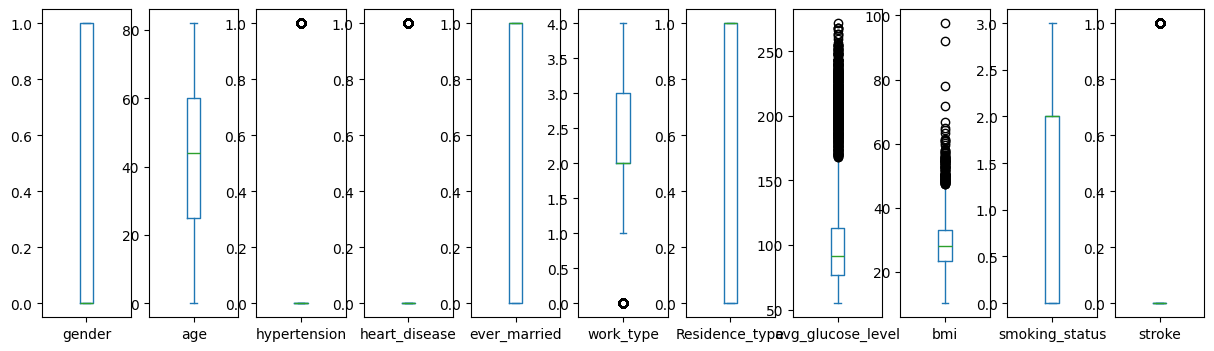

In [26]:
df.plot(kind = "box", figsize = (15,4), subplots = True)

# Heatmap

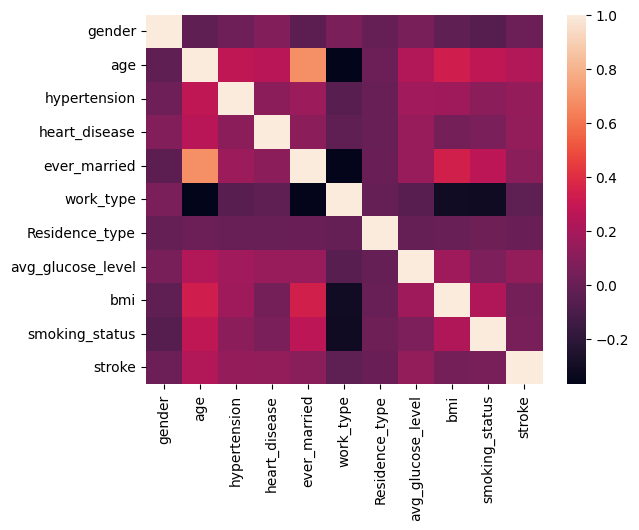

In [27]:
corr_matrix = df.corr(method='pearson')
ax=sns.heatmap(corr_matrix)

In [28]:
target_corr = corr_matrix[['stroke']]
target_corr

,stroke
gender,0.006904
age,0.232313
hypertension,0.142503
heart_disease,0.137929
ever_married,0.105051
work_type,-0.033763
Residence_type,0.005988
avg_glucose_level,0.138984
bmi,0.042341
smoking_status,0.051544


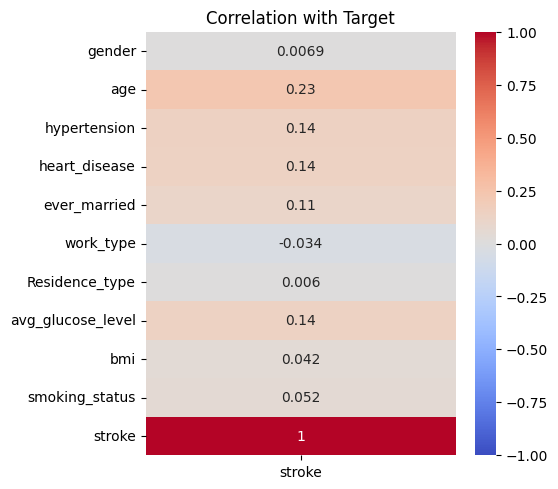

In [29]:
plt.figure(figsize=(5, len(target_corr)*0.5)) # adjust the size as needed
sns.heatmap(target_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Target')
plt.show()

# Modeling

In [30]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [31]:
X_columns_list=[ 'age', 'hypertension', 'heart_disease', 'ever_married','work_type', 'avg_glucose_level', 'bmi','smoking_status']

X, y = df[X_columns_list], df['stroke']
X

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status
0,67.0,0,1,1,2,228.69,36.6,1
2,80.0,0,1,1,2,105.92,32.5,2
3,49.0,0,0,1,2,171.23,34.4,3
4,79.0,1,0,1,3,174.12,24.0,2
5,81.0,0,0,1,2,186.21,29.0,1
...,...,...,...,...,...,...,...,...
5104,13.0,0,0,0,4,103.08,18.6,0
5106,81.0,0,0,1,3,125.20,40.0,2
5107,35.0,0,0,1,3,82.99,30.6,2
5108,51.0,0,0,1,2,166.29,25.6,1


In [32]:
SC = StandardScaler()
X = SC.fit_transform(X)
joblib.dump(SC, 'Saved_Model_Status/Standard_scaler.pkl')

['Saved_Model_Status/Standard_scaler.pkl']

In [ ]:
# import joblib

# # Load the scaler from the file
# scaler = joblib.load('Standard_scaler.pkl')

In [33]:
def evaluate_models(X, y):
    results = []
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = [
        ('Logistic Regression', LogisticRegression(max_iter=1000)),
        ('Decision Tree', DecisionTreeClassifier()),
        ('Random Forest', RandomForestClassifier()),
        ('Gradient Boosting', GradientBoostingClassifier()),
        ('AdaBoost', AdaBoostClassifier()),
        ('Support Vector Machine', SVC()),
        ('K-Nearest Neighbors', KNeighborsClassifier()),
        ('Naive Bayes', GaussianNB()),
        ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ]

    # Evaluate each model
    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        results.append((name, accuracy, precision, recall, f1))

    # Create a DataFrame to display results
    df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
    df_styled = df.style.highlight_max(subset=['Accuracy', 'Precision', 'Recall', 'F1'], color='blue')
    display(df_styled)


In [34]:
evaluate_models(X,y)

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.946029,0.894970,0.946029,0.919791
1,Decision Tree,0.911405,0.908987,0.911405,0.910186
2,Random Forest,0.943992,0.894866,0.943992,0.918773
3,Gradient Boosting,0.942974,0.894813,0.942974,0.918262
4,AdaBoost,0.943992,0.894866,0.943992,0.918773
5,Support Vector Machine,0.946029,0.894970,0.946029,0.919791
6,K-Nearest Neighbors,0.943992,0.894866,0.943992,0.918773
7,Naive Bayes,0.870672,0.922148,0.870672,0.892908
8,XGBoost,0.942974,0.911964,0.942974,0.921802


# Random Undersampling

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
rus = RandomUnderSampler(random_state=42)
X_unsampled, y_unsampled = rus.fit_resample(X_train, y_train)

In [37]:
evaluate_models(X_unsampled, y_unsampled)

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.761905,0.763946,0.761905,0.761182
1,Decision Tree,0.666667,0.668695,0.666667,0.666162
2,Random Forest,0.793651,0.800746,0.793651,0.792077
3,Gradient Boosting,0.761905,0.768092,0.761905,0.760089
4,AdaBoost,0.761905,0.768092,0.761905,0.760089
5,Support Vector Machine,0.809524,0.820652,0.809524,0.807483
6,K-Nearest Neighbors,0.714286,0.727950,0.714286,0.708995
7,Naive Bayes,0.761905,0.763946,0.761905,0.761182
8,XGBoost,0.730159,0.741199,0.730159,0.726289


# Random Oversampling

In [38]:
ros = RandomOverSampler(random_state=42)
X_ovsampled, y_ovsampled = ros.fit_resample(X, y)

In [39]:
evaluate_models(X_ovsampled, y_ovsampled)

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.788298,0.788382,0.788298,0.788212
1,Decision Tree,0.976064,0.977138,0.976064,0.976039
2,Random Forest,0.990957,0.991115,0.990957,0.990955
3,Gradient Boosting,0.871809,0.878421,0.871809,0.871052
4,AdaBoost,0.804255,0.810243,0.804255,0.802949
5,Support Vector Machine,0.825000,0.825922,0.825000,0.824752
6,K-Nearest Neighbors,0.945745,0.950965,0.945745,0.945527
7,Naive Bayes,0.762766,0.763555,0.762766,0.762742
8,XGBoost,0.986702,0.987040,0.986702,0.986696


# SMOTE 

In [40]:
smote = SMOTE(random_state=42)
X_smsampled, y_smsampled = smote.fit_resample(X, y)

In [41]:
evaluate_models(X_smsampled, y_smsampled)

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.789362,0.789348,0.789362,0.789341
1,Decision Tree,0.911702,0.911708,0.911702,0.911696
2,Random Forest,0.948404,0.948568,0.948404,0.948389
3,Gradient Boosting,0.886702,0.886746,0.886702,0.886682
4,AdaBoost,0.853191,0.855065,0.853191,0.852867
5,Support Vector Machine,0.833511,0.835291,0.833511,0.833135
6,K-Nearest Neighbors,0.915957,0.924933,0.915957,0.915382
7,Naive Bayes,0.772872,0.772877,0.772872,0.772875
8,XGBoost,0.951596,0.951597,0.951596,0.951596


# pipline data preprosseing

In [ ]:
# class CustomLabelEncoder(BaseEstimator, TransformerMixin):
#     def __init__(self):
#         self.encoders = {}

#     def fit(self, X, y=None):
#         for column in X.columns:
#             le = LabelEncoder()
#             le.fit(X[column])
#             self.encoders[column] = le
#         return self

#     def transform(self, X):
#         X_transformed = X.copy()
#         for column in X.columns:
#             le = self.encoders[column]
#             X_transformed[column] = le.transform(X[column])
#         return X_transformed

In [ ]:
# class DropMissingValues(BaseEstimator, TransformerMixin):
#     def fit(self, X, y=None):
#         return self

#     def transform(self, X):
#         return X.dropna()

In [ ]:
# numerical_features = ['age', 'avg_glucose_level' ,'bmi']
# categorical_features = [ 'ever_married','work_type','smoking_status']

In [ ]:
# numerical_transformer = Pipeline(steps=[
#     ('drop_missing', DropMissingValues()),
#     ('scaler', StandardScaler())
# ])

In [ ]:
# categorical_transformer = Pipeline(steps=[
#     ('label_encoder', CustomLabelEncoder()),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

In [ ]:
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, numerical_features),
#         ('cat', categorical_transformer, categorical_features)
#     ])

In [ ]:
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor)
# ])

In [ ]:
# pipeline.fit(df)
# df_transformed = pipeline.transform(df)
# joblib.dump(pipeline, 'preprocessing_pipeline.pkl')

# After Show Many different technic of solve imbalance data the best one and try fit and training and save the model 

In [42]:
ros = RandomOverSampler(random_state=42)
X_ovsampled, y_ovsampled = ros.fit_resample(X, y)

In [44]:
 X_train, X_test, y_train, y_test = train_test_split(X_ovsampled, y_ovsampled, test_size=0.2, random_state=42)


    
model=RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Result of Random Forest Classifier:-")
print("Accuracy : "+str(accuracy))
print("precision : "+str(precision))
print("recall : "+str(recall)  )
print("f1 : "+str(f1))

Result of Random Forest Classifier:-
Accuracy : 0.9920212765957447
precision : 0.9845837615621789
recall : 1.0
f1 : 0.9922320041429311


In [45]:
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[907  15]
 [  0 958]]


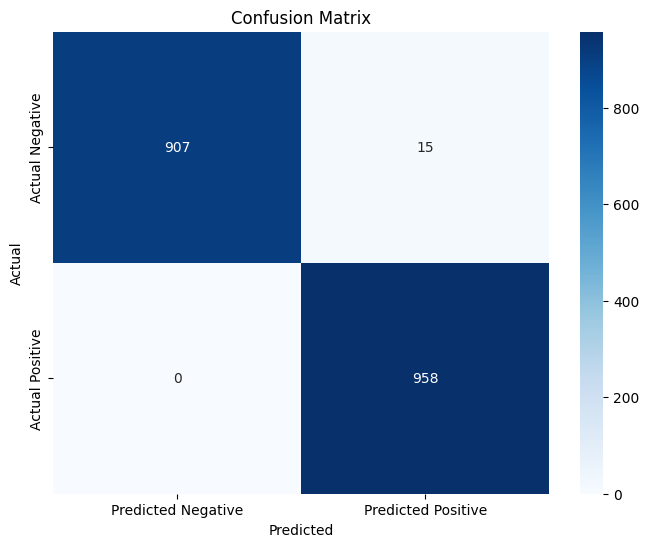

In [46]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [47]:
with open('Saved_Model_Status/StrokeModelRandomForest','wb') as file: # write binary 
    pickle.dump(model,file) # put model into file

In [48]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')